In [7]:

# importing some basic libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [5]:
class SVM(object):
    def __init__(self,visualization=True):
        self.visualization=visualization
        self.colors={1:"r",-1:"b"}
        if self.visualization:
            self.fig=plt.figure()
            self.ax=self.fig.add_subplot(1,1,1)
    def fit(self,data):
        self.data=data
        opt_dict={}
        transforms=[[1,1],[-1,1],[-1,-1],[1,-1]]
        all_data=np.array([])
        for yi in self.data:
            all_data=np.append(all_data,self.data[yi])
        self.max_feature_value=max(all_data)
        self.min_feature_value=min(all_data)
        all_data=None
        step_sizes=[self.max_feature_value*0.1,
                   self.max_feature_value*0.01,
                   self.max_feature_value*0.001,]
        b_range_multiple=5
        b_multiple=5
        latest_optimum=self.max_feature_value*10
        for step in step_sizes:
            w=np.array([latest_optimum,latest_optimum])
            optimized=False
            while not optimized:
                    for b in np.arange(-1*self.max_feature_value,
                                      self.max_feature_value*b_range_multiple,
                                      step*b_multiple):
                        for transformation in transforms:
                            w_t=w*transformation
                            found_option=True
                            for i in self.data:
                                for xi in self.data[i]:
                                    yi=i
                                    if not yi*(np.dot(w_t,xi)+b)>=1:
                                        found_option=False
                            if found_option:
                                opt_dict[np.linalg.norm(w_t,b)]=[w_t,b]
                    if w[0]<0:
                        optimized=True
                    else:
                        w=w-step
                        norms = sorted([n for n in opt_dict])
                        opt_choice=opt_dict[norms[0]]
                        self.w=opt_choice[0]
                        self.b=opt_choice[1]
                        latest_optimum=opt_choice[0][0]+step*2
    def predict(self,features):
        classification=np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0 and self.visualization:
            self.ax.scatter(features [0],features[1],s=200,marker="*",c=self.colors[classification])
        return (classification,np.dot(np.array(features),self.w)+self.b)
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,c=self.colors[i])for x in data_dict[i]] for i in data_dict]
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]
        hyp_x_min=self.min_feature_value*0.9
        hyp_x_max=self.max_feature_value*1.1
        #Positive SVM
        pav1=hyperplane(hyp_x_min,self.w,self.b,1)
        pav2=hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[pav1,pav2],"k")
        #Negative SVM
        nav1=hyperplane(hyp_x_min,self.w,self.b,-1)
        nav2=hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nav1,nav2],"k")
        # db support vector hyperplane
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')
        
        

In [8]:
#defining a basic data
data_dict = {-1:np.array([[1,7],[2,8],[3,8]]),1:np.array([[5,1],[6,-1],[7,3]])}
data_dict

{-1: array([[1, 7],
        [2, 8],
        [3, 8]]),
 1: array([[ 5,  1],
        [ 6, -1],
        [ 7,  3]])}

C:\Users\Admin\anaconda3\envs\tensoraksh\lib\site-packages\numpy\linalg\linalg.py:2570: RuntimeWarning: overflow encountered in double_scalars
  ret **= (1 / ord)


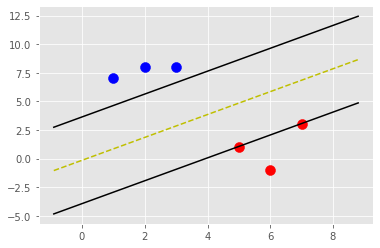

In [9]:
svm = SVM() # Linear Kernel
svm.fit(data=data_dict)
svm.visualize()